<a href="https://colab.research.google.com/github/gaurav4288/Machine_learning/blob/main/29_Outlier_remover_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv'
df = pd.read_csv(url)

df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


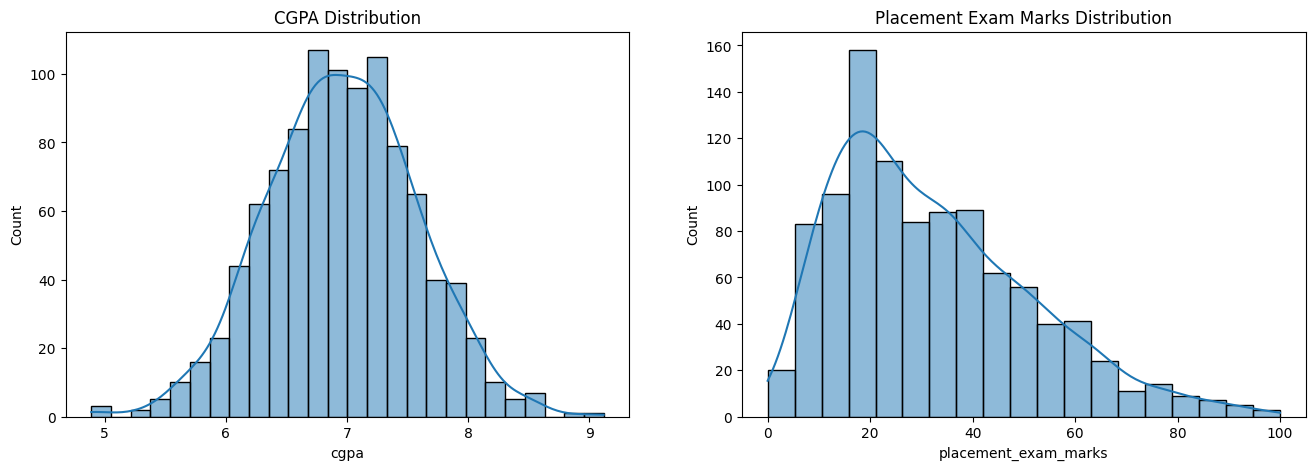

In [53]:
plt.figure(figsize=(16,5))

# CGPA distribution
plt.subplot(1,2,1)
sns.histplot(x='cgpa', data=df, kde=True)
plt.title('CGPA Distribution')

# Placement Exam Marks distribution
plt.subplot(1,2,2)
sns.histplot(x='placement_exam_marks', data=df, kde=True)
plt.title('Placement Exam Marks Distribution')

plt.show()

In [54]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

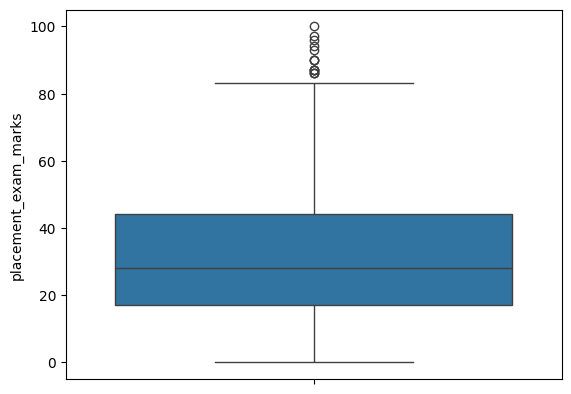

In [55]:
sns.boxplot(df['placement_exam_marks'])

In [56]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [57]:
percentile75

44.0

In [58]:
iqr = percentile75 - percentile25

In [59]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [60]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


In [61]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [62]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [63]:
new_df = df[(df['placement_exam_marks'] < upper_limit) | (df['placement_exam_marks'] < lower_limit)]

In [64]:
new_df.shape

(985, 3)

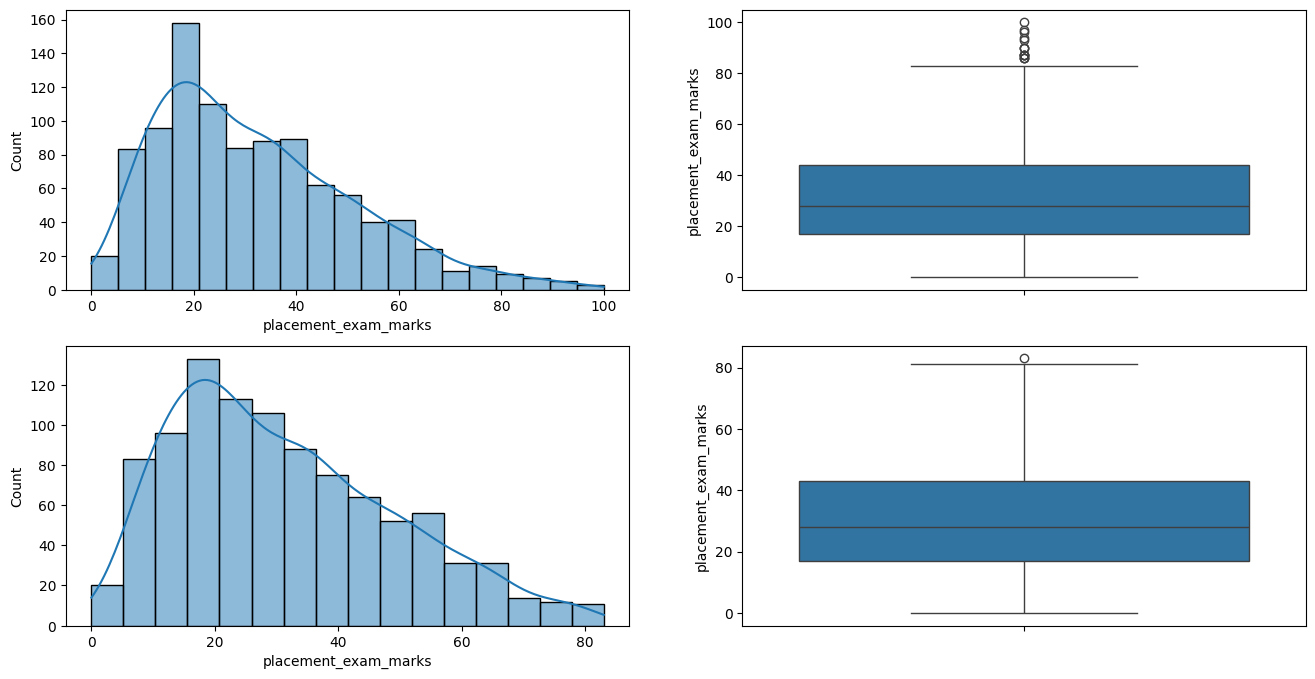

In [65]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

# **Capping**

In [66]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [67]:
# np.where(condtion,true,false)

In [71]:
 new_df_cap.shape

(1000, 3)

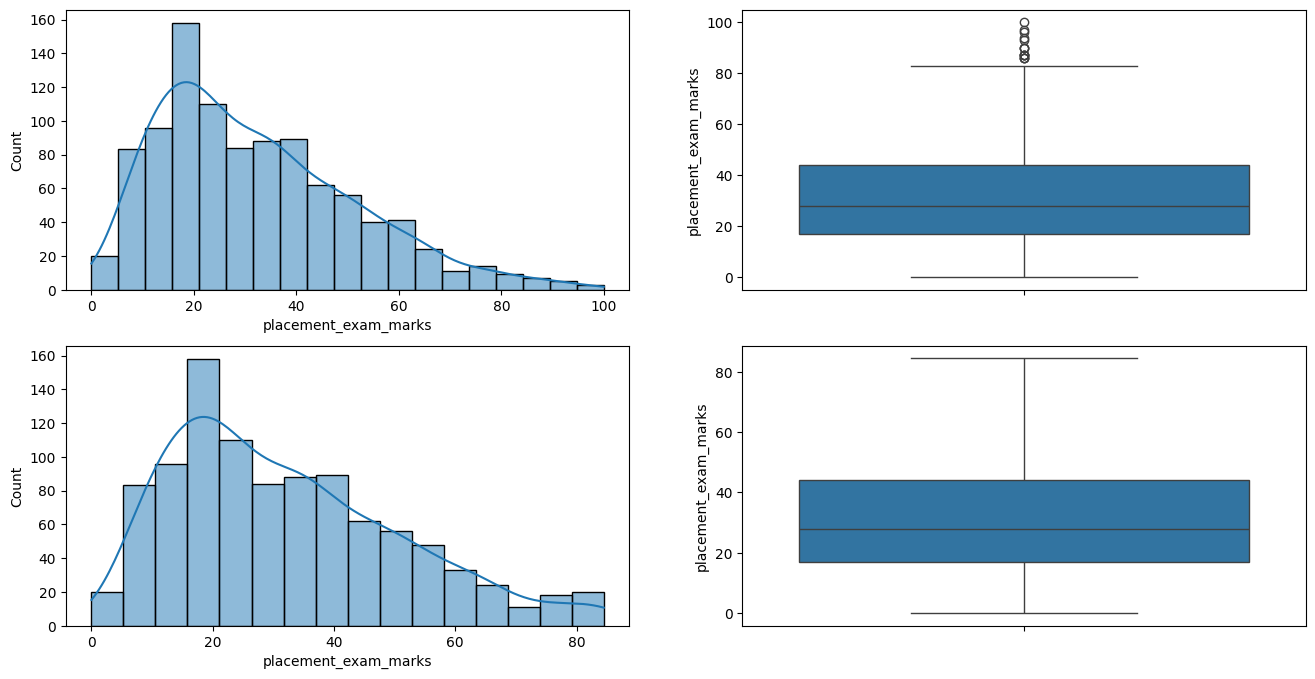

In [70]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()